
Linear Regression - MSE: 127200.47, R^2: 0.80
KNN Regression - MSE: 90112.31, R^2: 0.86


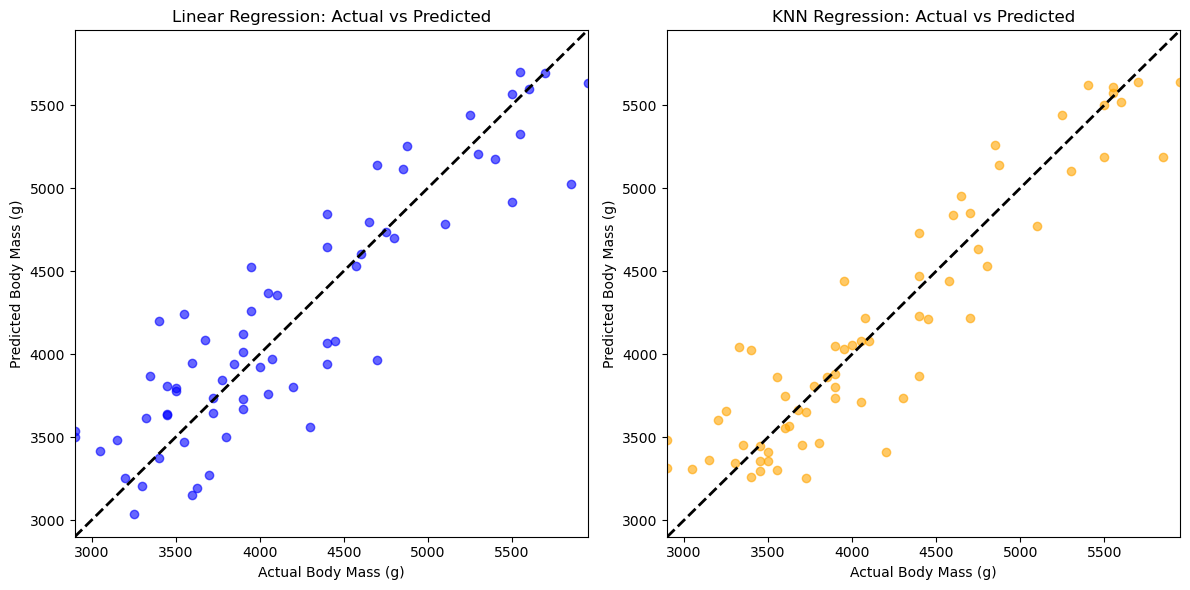

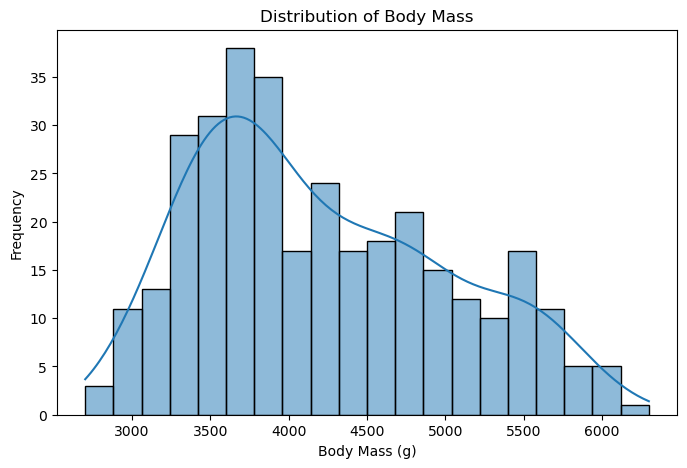

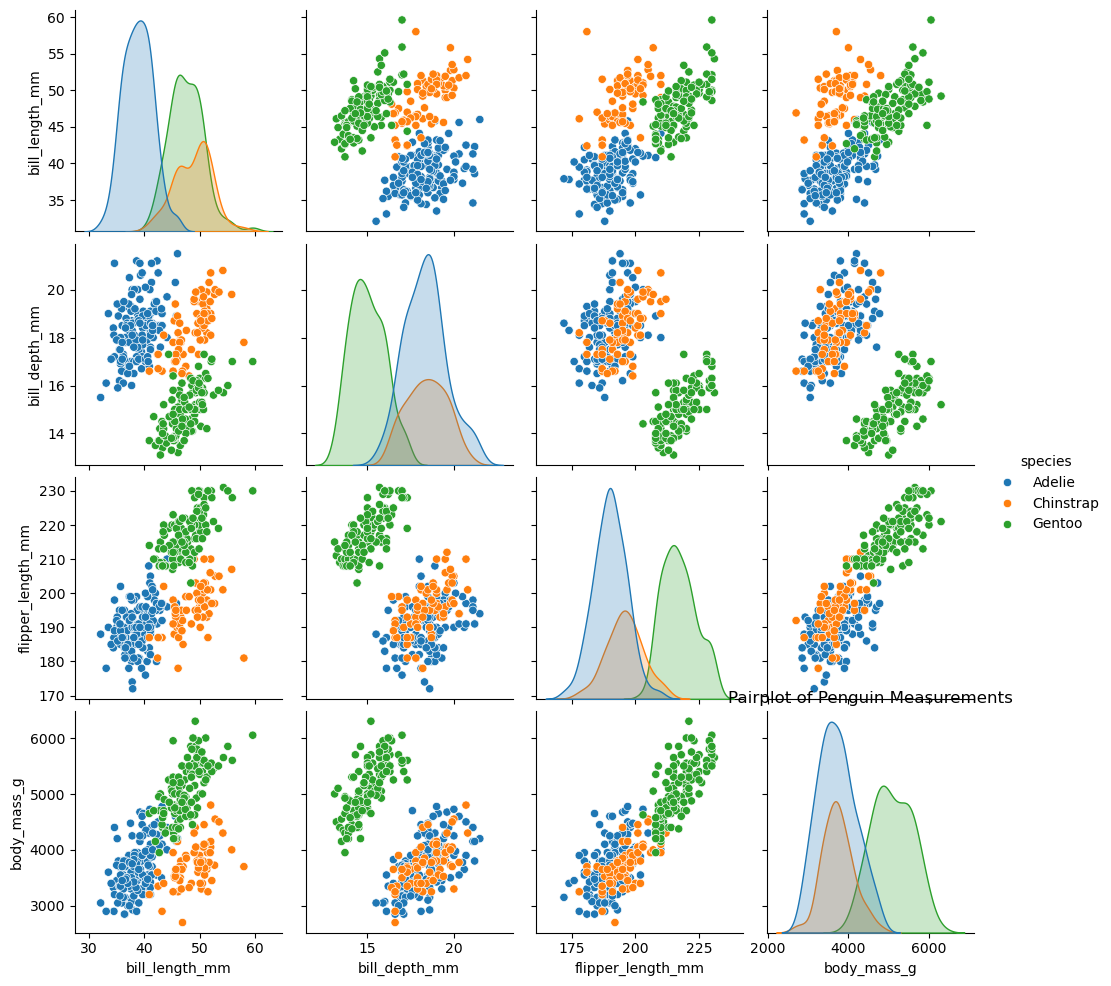

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values
# Exclude non-numeric columns
correlation_matrix = penguins.select_dtypes(include=[np.number]).corr()

# Select features and target variable
X = penguins[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']]  # Features
# Drop rows with missing values
penguins = penguins.dropna()

# Select features and target variable
X = penguins[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']]  # Features
y = penguins['body_mass_g']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate MSE and R^2 for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"\nLinear Regression - MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}")

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculate MSE and R^2 for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression - MSE: {mse_knn:.2f}, R^2: {r2_knn:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Body Mass (g)')
plt.ylabel('Predicted Body Mass (g)')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

# Plot for KNN Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('KNN Regression: Actual vs Predicted')
plt.xlabel('Actual Body Mass (g)')
plt.ylabel('Predicted Body Mass (g)')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()

# Additional Graphs: Distribution of Body Mass
plt.figure(figsize=(8, 5))
sns.histplot(penguins['body_mass_g'], bins=20, kde=True)
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(penguins, diag_kind='kde', hue='species')
plt.title('Pairplot of Penguin Measurements')
plt.show()


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the penguins dataset
penguins = sns.load_dataset('penguins').dropna()

# Select features and target variable
X = penguins[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']]
y = penguins['body_mass_g']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediction function
def predict(flipper_length, bill_length, bill_depth, model_type):
    input_data = np.array([[flipper_length, bill_length, bill_depth]])
    if model_type == "Linear Regression":
        prediction = linear_model.predict(input_data)
    else:
        prediction = knn_model.predict(input_data)
    return prediction[0]

# Data Analysis function
def analyze_data():
    # Descriptive Statistics
    desc_stats = penguins.describe().to_string()
    
    # Correlation Matrix
    correlation_matrix = penguins.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig("correlation_matrix.png")
    plt.close()

    # Distribution of Body Mass
    plt.figure(figsize=(8, 5))
    sns.histplot(penguins['body_mass_g'], bins=20, kde=True)
    plt.title('Distribution of Body Mass')
    plt.xlabel('Body Mass (g)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig("body_mass_distribution.png")
    plt.close()

    # Pairplot
    plt.figure(figsize=(10, 10))
    sns.pairplot(penguins, diag_kind='kde', hue='species')
    plt.title('Pairplot of Penguin Measurements')
    plt.tight_layout()
    plt.savefig("pairplot.png")
    plt.close()
    
    return desc_stats, correlation_matrix.values.tolist(), ["correlation_matrix.png", "body_mass_distribution.png", "pairplot.png"]

# Gradio interface for prediction
inputs = [
    gr.Slider(170, 230, label="Flipper Length (mm)"),
    gr.Slider(30, 60, label="Bill Length (mm)"),
    gr.Slider(10, 30, label="Bill Depth (mm)"),
    gr.Radio(["Linear Regression", "KNN Regression"], label="Select Model")
]

outputs = gr.Textbox(label="Predicted Body Mass (g)")

# Gradio interface for data analysis
data_analysis_interface = gr.Interface(
    fn=analyze_data,
    inputs=[],
    outputs=[
        gr.Textbox(label="Descriptive Statistics"),
        gr.Dataframe(label="Correlation Matrix"),
        gr.Gallery(label="Plots", show_label=False)
    ],
    title="Penguin Data Analysis",
    description="Get descriptive statistics and visualizations of the penguins dataset."
)

# Main Gradio app combining prediction and analysis
app = gr.TabbedInterface(
    [
        gr.Interface(fn=predict, inputs=inputs, outputs=outputs, title="Penguin Body Mass Predictor", description="Enter penguin measurements to predict body mass."),
        data_analysis_interface
    ]
)

app.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Linear Regression - MSE: 0.25, R^2: 0.45
KNN Regression - MSE: 0.01, R^2: 0.98


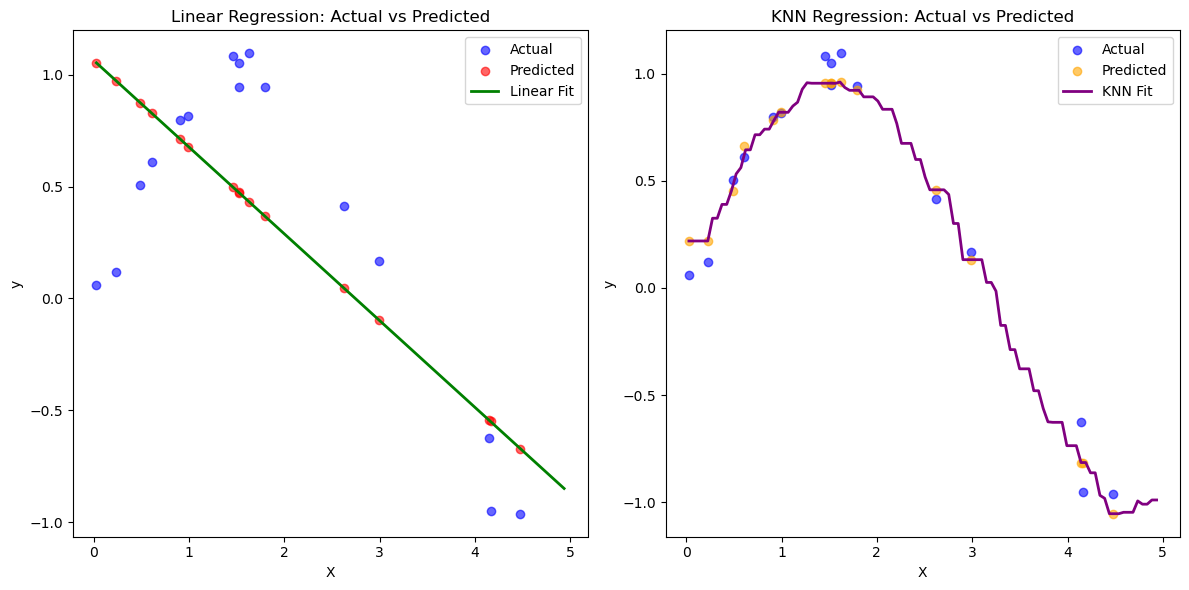

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Non-linear relationship with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculate MSE and R^2 for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}")

# Calculate MSE and R^2 for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression - MSE: {mse_knn:.2f}, R^2: {r2_knn:.2f}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred_linear, color='red', label='Predicted', alpha=0.6)
# Fit line for Linear Regression
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(x_range, linear_model.predict(x_range), color='green', label='Linear Fit', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Plot for KNN Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred_knn, color='orange', label='Predicted', alpha=0.6)
# KNN regression doesn't have a simple fit line; we can plot predictions over the range
plt.plot(x_range, knn_model.predict(x_range), color='purple', label='KNN Fit', linewidth=2)
plt.title('KNN Regression: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


KNN Regression - MSE: 1.23, R^2: 0.06
Polynomial Regression - MSE: 1.18, R^2: 0.10


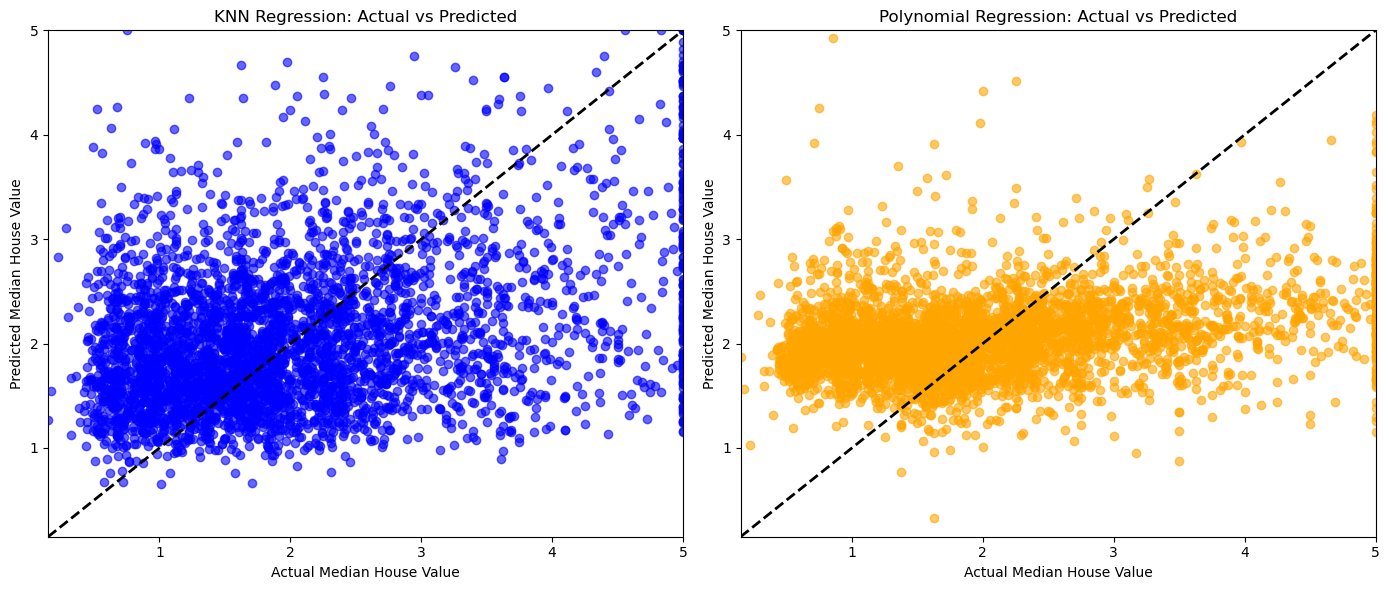

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.frame

# Select features and target variable
# Using "House Age" and "Average Rooms" for this example
X = data[['HouseAge', 'AveRooms']]
y = data['MedHouseVal']  # Median house value

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=3)  # Adjust degree as needed
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predicting with polynomial regression
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate MSE and R^2 for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate MSE and R^2 for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Output results
print(f"KNN Regression - MSE: {mse_knn:.2f}, R^2: {r2_knn:.2f}")
print(f"Polynomial Regression - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Visualize the results
plt.figure(figsize=(14, 6))

# KNN Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('KNN Regression: Actual vs Predicted')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()


KNN Regression - MSE: 2180499.11, R^2: 0.86
Polynomial Regression - MSE: 2003058.93, R^2: 0.87


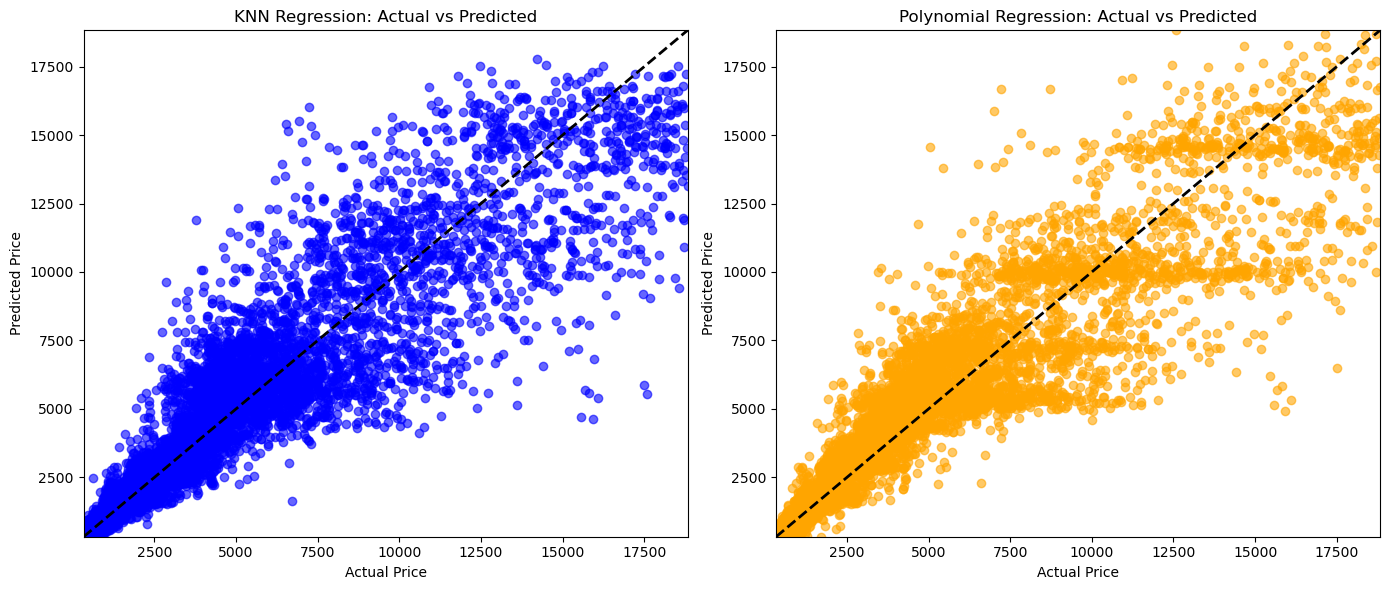

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target variable
# Using 'carat' and 'depth' to predict 'price'
X = diamonds[['carat', 'depth']]
y = diamonds['price']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with X

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=3)  # Adjust degree as needed
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predicting with polynomial regression
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate MSE and R^2 for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate MSE and R^2 for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Output results
print(f"KNN Regression - MSE: {mse_knn:.2f}, R^2: {r2_knn:.2f}")
print(f"Polynomial Regression - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Visualize the results
plt.figure(figsize=(14, 6))

# KNN Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('KNN Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()


KNN Regression - MSE: 1.09, R^2: 0.32
Polynomial Regression - MSE: 0.96, R^2: 0.40


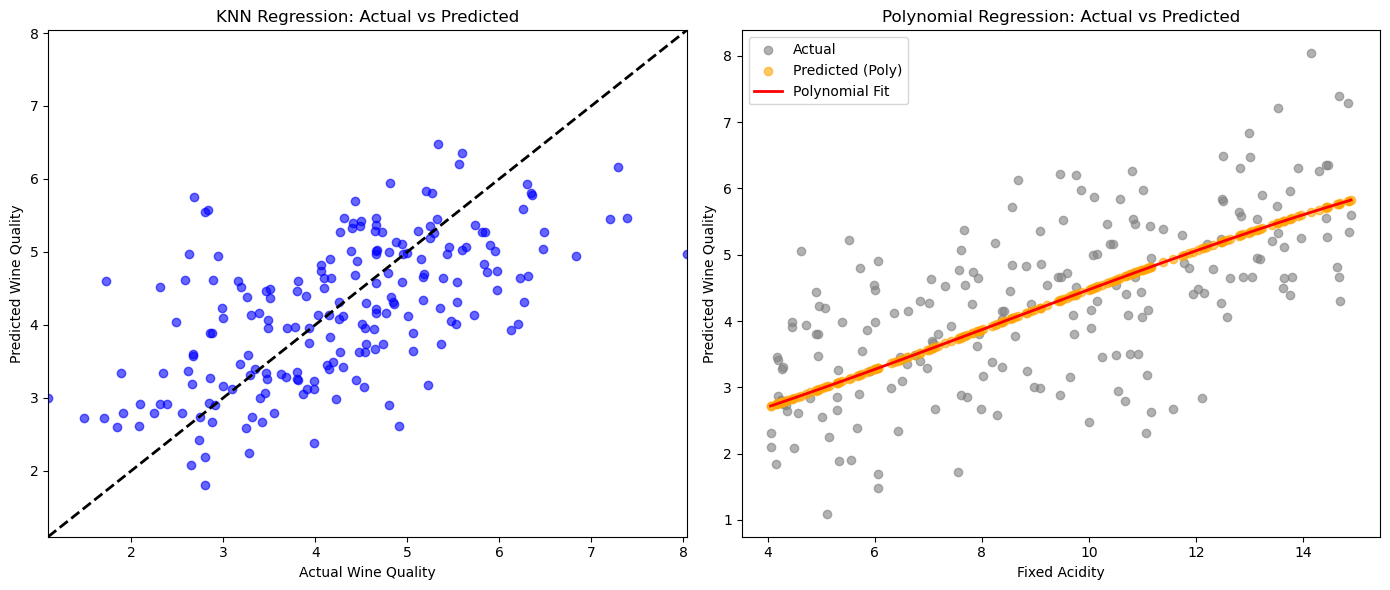

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Simulating a dataset similar to Wine Quality
np.random.seed(42)
n_samples = 1000
X = pd.DataFrame({
    'fixed_acidity': np.random.uniform(4, 15, n_samples),
    'volatile_acidity': np.random.uniform(0, 1.5, n_samples),
    'citric_acid': np.random.uniform(0, 1, n_samples),
    'residual_sugar': np.random.uniform(0.5, 15, n_samples),
})
y = (X['fixed_acidity'] * 0.3 + X['volatile_acidity'] * -0.4 + 
     X['citric_acid'] * 0.5 + X['residual_sugar'] * 0.2 + np.random.normal(0, 0.5, n_samples))

# Use only one feature for polynomial regression
X_single = X[['fixed_acidity']]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=3)  # Adjust degree as needed
X_poly_train = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predicting with polynomial regression
X_poly_test = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_poly_test)

# Calculate MSE and R^2 for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate MSE and R^2 for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Output results
print(f"KNN Regression - MSE: {mse_knn:.2f}, R^2: {r2_knn:.2f}")
print(f"Polynomial Regression - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Visualize the results
plt.figure(figsize=(14, 6))

# KNN Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('KNN Regression: Actual vs Predicted')
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
# Sort values for better plotting
sort_index = X_test['fixed_acidity'].argsort()
plt.scatter(X_test['fixed_acidity'], y_test, color='gray', alpha=0.6, label='Actual')
plt.scatter(X_test['fixed_acidity'], y_pred_poly, color='orange', alpha=0.6, label='Predicted (Poly)')
plt.plot(X_test['fixed_acidity'].iloc[sort_index], y_pred_poly[sort_index], color='red', lw=2, label='Polynomial Fit')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Fixed Acidity')
plt.ylabel('Predicted Wine Quality')
plt.legend()
plt.tight_layout()

plt.show()
